In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
sns.color_palette('colorblind')
plt.rcParams['figure.dpi']=600

In [2]:
TCGAHealthy = pd.read_pickle('../Data/TCGAHealthy.pkl')
TCGACancer = pd.read_pickle('../Data/TCGACancer.pkl')
GTEX = pd.read_pickle('../Data/GTEX.pkl')
GTEX['Target'] = 2

In [3]:
Prostate = TCGAHealthy.append(TCGACancer.append(GTEX))
Prostate = Prostate.sample(frac=1).reset_index(drop=True)

In [4]:
data = Prostate.drop("Target", axis=1)
Target = Prostate['Target']

In [5]:
summary = pd.read_pickle('../Data/MI_Grades_NoSplit5.pkl')

In [6]:
top = np.hstack([summary.sort_values('MutualInfo',ascending=False).head(5)["GeneID"].values,['Target']])

In [7]:
Prostate = Prostate[top]
TCGAHealthy = TCGAHealthy[top]
TCGACancer = TCGACancer[top]
GTEX = GTEX[top]

In [11]:
def GmmPlot(data,name,ax):
    dataReduced1 = PCA(n_components=48).fit_transform(data.drop("Target",axis=1))
    dataReduced2 = TSNE(n_components=2).fit_transform(dataReduced1)
    model = GaussianMixture(n_components=2)
    model.fit(dataReduced2)

    x = np.linspace(-100., 100.,num=300)
    y = np.linspace(-100., 100.,num=300)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -model.score_samples(XX)
    Z = Z.reshape(X.shape)

    ax.set_title(name)
    CS = ax.contour(X, Y, Z,levels=np.sqrt(np.linspace(np.min(Z),np.max(Z)**2,400)),alpha=.25)
    ax.scatter(dataReduced2[:,0],dataReduced2[:,1],s=1,c=data["Target"].values)

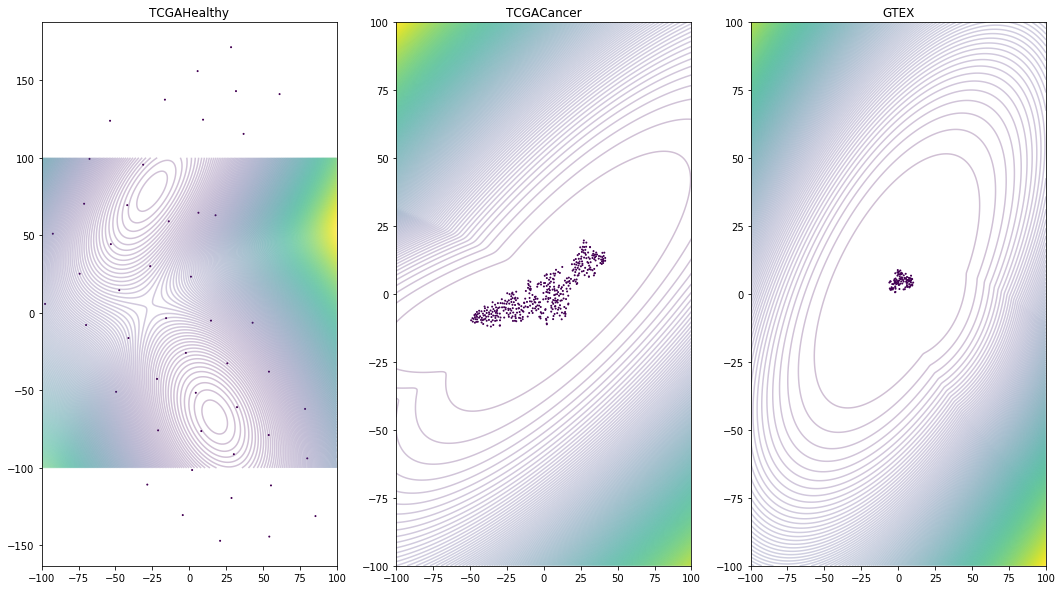

In [12]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(18,10))

GmmPlot(TCGAHealthy,"TCGAHealthy", axs[0])
GmmPlot(TCGACancer,"TCGACancer", axs[1])
GmmPlot(GTEX,"GTEX", axs[2])

In [8]:
#ProstateReduced1 = PCA(n_components=50).fit_transform(Prostate.drop("Target",axis=1))
ProstateReduced2 = TSNE(n_components=2).fit_transform(Prostate.drop("Target",axis=1))
model = GaussianMixture(n_components=3)
model.fit(ProstateReduced2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [9]:
nameDict = {0:"TCGAHealthy", 1:"Cancer", 2:"GTEX"}

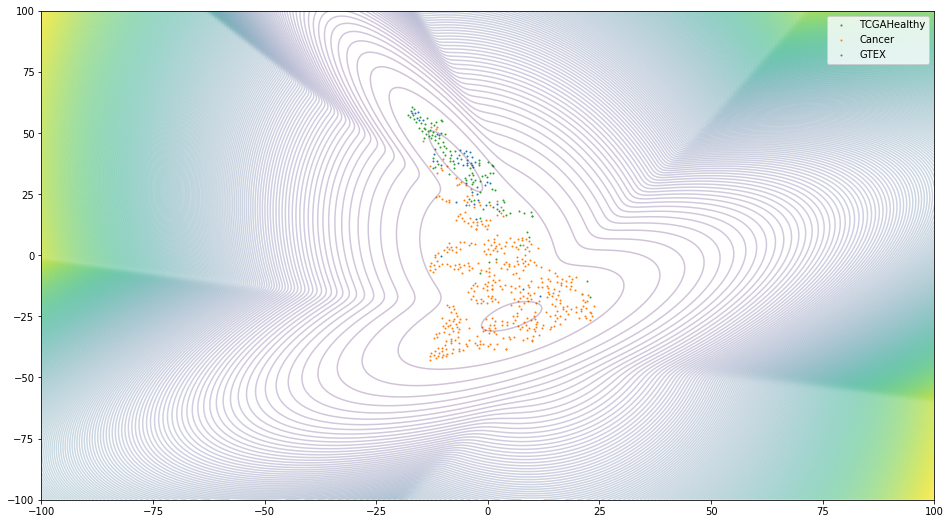

In [10]:
fig,axs = plt.subplots(figsize=(16,9))
x = np.linspace(-100., 100.,num=300)
y = np.linspace(-100., 100.,num=300)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model.score_samples(XX)
Z = Z.reshape(X.shape)

CS = axs.contour(X, Y, Z,levels=np.sqrt(np.linspace(np.min(Z),np.max(Z)**2,400)),alpha=.25)

for i in range(3):
    dslice = [np.where(Prostate["Target"]==i)[0]]

    axs.scatter(ProstateReduced2[:,0][dslice],ProstateReduced2[:,1][dslice],s=1,label=nameDict[i])
    
axs.legend()

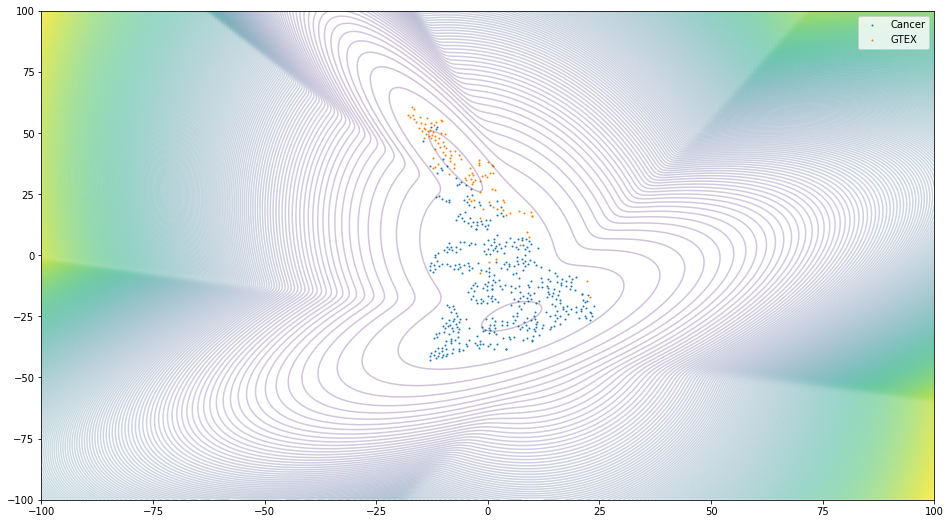

In [11]:
fig,axs = plt.subplots(figsize=(16,9))
x = np.linspace(-100., 100.,num=300)
y = np.linspace(-100., 100.,num=300)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model.score_samples(XX)
Z = Z.reshape(X.shape)

CS = axs.contour(X, Y, Z,levels=np.sqrt(np.linspace(np.min(Z),np.max(Z)**2,400)),alpha=.25)

for i in [1,2]:
    dslice = [np.where(Prostate["Target"]==i)[0]]

    axs.scatter(ProstateReduced2[:,0][dslice],ProstateReduced2[:,1][dslice],s=1,label=nameDict[i])
    
axs.legend()

# Just TCGA Healthy vs GTEX

In [12]:
AllHealthy = TCGAHealthy.append(GTEX)
AllHealthy = AllHealthy.sample(frac=1).reset_index(drop=True)

In [13]:
Healthy = AllHealthy.copy(deep=True)
Healthy.drop('Target',axis=1, inplace=True)
Target = AllHealthy['Target']

In [14]:
summary = pd.read_pickle('../Data/MI_Grades_NoSplit5.pkl')

In [15]:
top_justHealthy_nosplit = np.hstack([summary.sort_values('MutualInfo',ascending=False).head(5)["GeneID"].values,['Target']])

In [16]:
AllHealthy = AllHealthy[top_justHealthy_nosplit]

In [17]:
#HealthyReduced1 = PCA(n_components=50).fit_transform(AllHealthy.drop("Target",axis=1))
HealthyReduced2 = TSNE(n_components=2).fit_transform(AllHealthy.drop("Target",axis=1))
modelH = GaussianMixture(n_components=2)
modelH.fit(HealthyReduced2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [18]:
nameDict = {0:"TCGAHealthy", 2:"GTEX"}

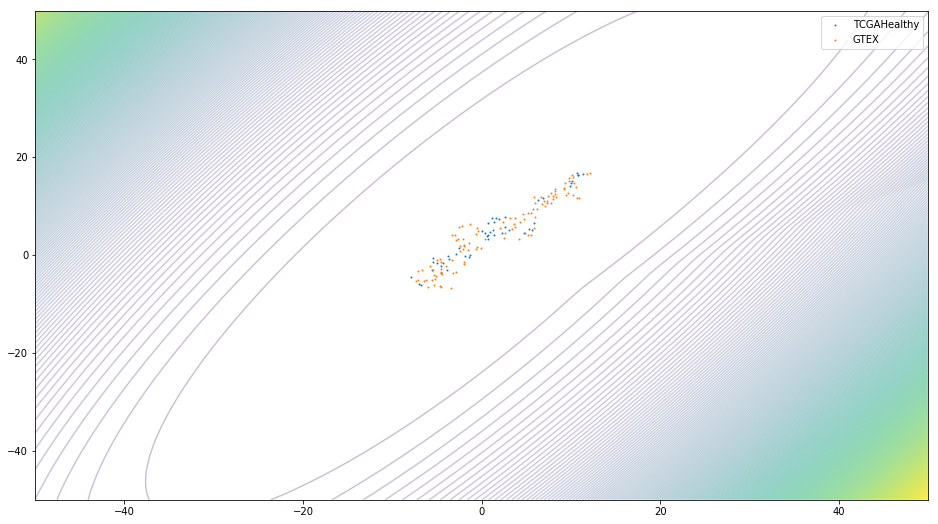

In [19]:
fig,axs = plt.subplots(figsize=(16,9))
x = np.linspace(-50., 50.,num=300)
y = np.linspace(-50., 50.,num=300)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -modelH.score_samples(XX)
Z = Z.reshape(X.shape)

CS = axs.contour(X, Y, Z,levels=np.sqrt(np.linspace(np.min(Z),np.max(Z)**2,400)),alpha=.25)

for i in [0,2]:
    dslice = [np.where(AllHealthy["Target"]==i)[0]]

    axs.scatter(HealthyReduced2[:,0][dslice],HealthyReduced2[:,1][dslice],s=1,label=nameDict[i])
    
axs.legend()

# Combining Both Healthy Sets

In [81]:
GTEXBinary = GTEX
GTEXBinary['Target'] = 0

In [85]:
ProstateBinary = TCGAHealthy.append(TCGACancer.append(GTEXBinary))
ProstateBinary = ProstateBinary.sample(frac=1).reset_index(drop=True)

In [100]:
ProstateBinReduced1 = PCA(n_components=50).fit_transform(ProstateBinary.drop("Target",axis=1))
ProstateBinReduced2 = TSNE(n_components=2).fit_transform(ProstateBinReduced1)
modelBin = GaussianMixture(n_components=2)
modelBin.fit(ProstateBinReduced2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

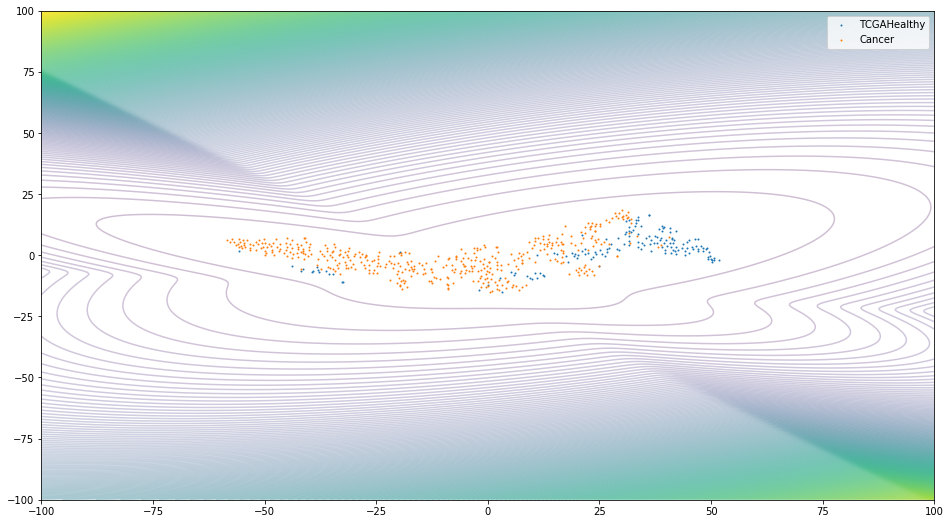

In [101]:
fig,axs = plt.subplots(figsize=(16,9))
x = np.linspace(-100., 100.,num=300)
y = np.linspace(-100., 100.,num=300)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -modelBin.score_samples(XX)
Z = Z.reshape(X.shape)

CS = axs.contour(X, Y, Z,levels=np.sqrt(np.linspace(np.min(Z),np.max(Z)**2,400)),alpha=.25)

for i in range(2):
    dslice = [np.where(ProstateBinary["Target"]==i)[0]]

    axs.scatter(ProstateBinReduced2[:,0][dslice],ProstateBinReduced2[:,1][dslice],s=1,label=nameDict[i])
    
axs.legend()